In [ ]:
import glob, cv2, os, shutil
from shutil import copyfile
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [156]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
keras.__version__

'2.15.0'

In [158]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

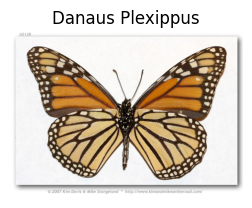

In [105]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train/Danaus_Plexippus/001_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Danaus Plexippus')
plt.show()

In [106]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

In [107]:
x2.shape

(1, 600, 840, 3)

<ipython-input-108-dfc6657e00f1>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i)


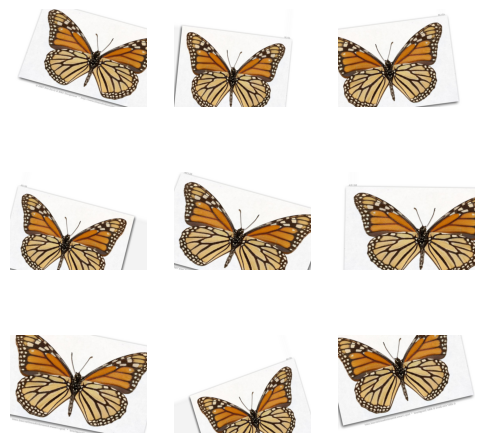

In [108]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

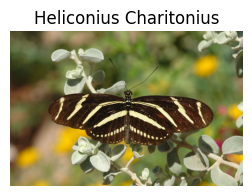

In [110]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train/Heliconius_Charitonius/002_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Charitonius')
plt.show()

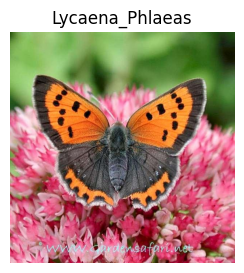

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Lycaena_Phlaeas/005_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Lycaena_Phlaeas')
plt.show()

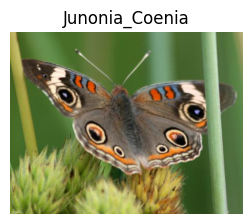

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Junonia_Coenia/004_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Junonia_Coenia')
plt.show()

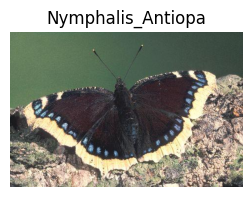

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Nymphalis_Antiopa/006_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Nymphalis_Antiopa')
plt.show()

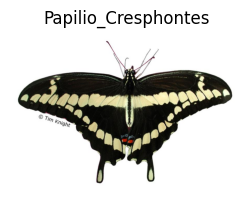

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Papilio_Cresphontes/007_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Papilio_Cresphontes')
plt.show()

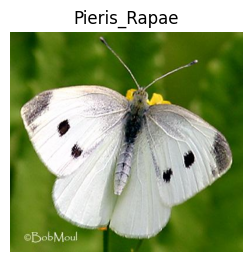

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Pieris_Rapae/008_0001.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Pieris_Rapae')
plt.show()

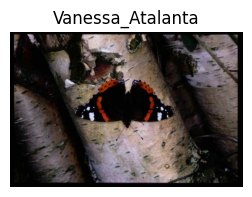

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Vanessa_Atalanta/009_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa_Atalanta')
plt.show()

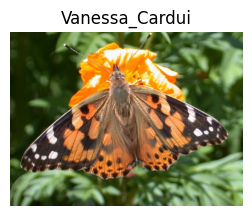

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Vanessa_Cardui/010_0002.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa_Cardui')
plt.show()

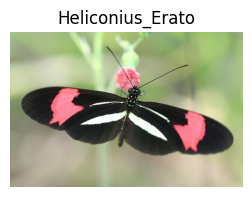

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Heliconius_Erato/003_0002.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius_Erato')
plt.show()

In [111]:
# default settings
img_width, img_height = 224, 224

train_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train'
validate_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/validation/validate'
test_dir='/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/test'
nb_epochs = 20
batch_size = 32
nb_classes = 10

In [112]:
def count_images(directory):
    total_images = 0
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            class_images = len(glob.glob(os.path.join(class_path, '*.jpg')))  # Assuming images have .jpg extension
            total_images += class_images
    return total_images

Training images

In [113]:
nb_train_samples=592
nb_train_samples

592

In [114]:
nb_validate_samples=169
nb_validate_samples

169

In [115]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [116]:
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [117]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 592 images belonging to 10 classes.


In [118]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 169 images belonging to 10 classes.


In [160]:
# set up transfer learning on pre-trained ImageNet Inception_V3 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
incepV3_model = InceptionV3(weights = 'imagenet', include_top = False)
x = incepV3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(inputs = incepV3_model.input, outputs = predictions)

In [161]:
# freeze all layers of the pre-trained model
for layer in incepV3_model.layers:
    layer.trainable = False

In [162]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [163]:
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    epochs=nb_epochs,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validate_generator,
    validation_steps=nb_validate_samples // batch_size
)
print('Training time: %s' % (now() - t))

<ipython-input-163-63558918a037>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_learning_history = model.fit_generator(


Epoch 1/20
18/18 [==============================] - 23s 890ms/step - loss: 3.8422 - accuracy: 0.5851 - val_loss: 0.6100 - val_accuracy: 0.8313
Epoch 2/20
18/18 [==============================] - 16s 897ms/step - loss: 0.5337 - accuracy: 0.8339 - val_loss: 2.4974 - val_accuracy: 0.6875
Epoch 3/20
18/18 [==============================] - 16s 910ms/step - loss: 0.7045 - accuracy: 0.8536 - val_loss: 0.1633 - val_accuracy: 0.9625
Epoch 4/20
18/18 [==============================] - 17s 965ms/step - loss: 0.2487 - accuracy: 0.9214 - val_loss: 0.5736 - val_accuracy: 0.8250
Epoch 5/20
18/18 [==============================] - 15s 826ms/step - loss: 0.2667 - accuracy: 0.9286 - val_loss: 0.1669 - val_accuracy: 0.9312
Epoch 6/20
18/18 [==============================] - 16s 929ms/step - loss: 0.2229 - accuracy: 0.9250 - val_loss: 0.1033 - val_accuracy: 0.9625
Epoch 7/20
18/18 [==============================] - 16s 870ms/step - loss: 0.2153 - accuracy: 0.9357 - val_loss: 0.1176 - val_accuracy: 0.9625

In [165]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-165-b1de38505234>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)


Test Score: 0.29817628860473633
Test Accuracy: 0.9526627063751221


In [166]:
model.save('butterflies_inception_v3_model_tl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


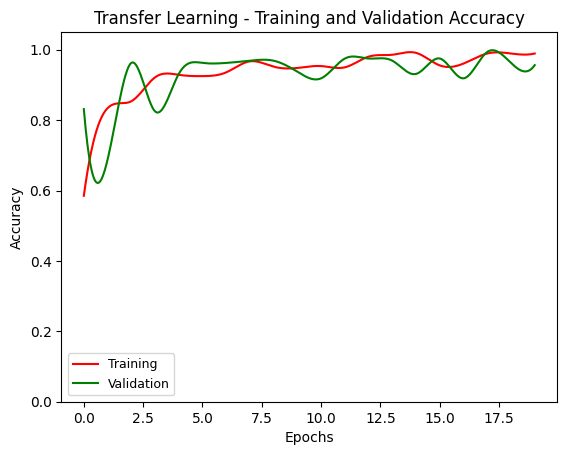

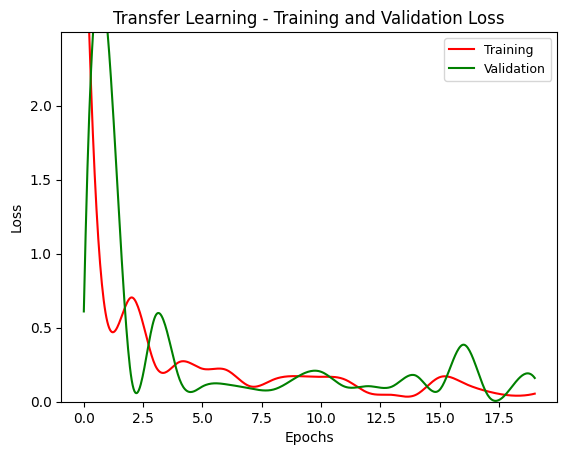

In [167]:
from scipy.interpolate import interp1d

xfer_acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.legend(loc='lower left', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.legend(loc='upper right', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(y1))
plt.show()


In [168]:
validate_generator.total_batches_seen

384

In [169]:
directory = "/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/test/butterflies_test"

# Define the pattern to match image files (e.g., JPG or PNG)
pattern = directory + "/*.jpg"  # Adjust the extension as per your image file format

# Use glob to find all files matching the pattern and count them
num_images = len(glob.glob(pattern))
num_images

71

In [170]:
predict_files=glob.glob(pattern)

In [171]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [172]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

1/1 [==============================] - 0s 35ms/step


In [177]:
final = pd.DataFrame()
final["id"] = image_id
final["Butterfly"] = predictor
final.head(num_images)

id  Butterfly
0   /content/drive/MyDrive/Colab Notebooks/Image C...          0
1   /content/drive/MyDrive/Colab Notebooks/Image C...          6
2   /content/drive/MyDrive/Colab Notebooks/Image C...          8
3   /content/drive/MyDrive/Colab Notebooks/Image C...          4
4   /content/drive/MyDrive/Colab Notebooks/Image C...          6
..                                                ...        ...
66  /content/drive/MyDrive/Colab Notebooks/Image C...          3
67  /content/drive/MyDrive/Colab Notebooks/Image C...          8
68  /content/drive/MyDrive/Colab Notebooks/Image C...          0
69  /content/drive/MyDrive/Colab Notebooks/Image C...          1
70  /content/drive/MyDrive/Colab Notebooks/Image C...          9

[71 rows x 2 columns]

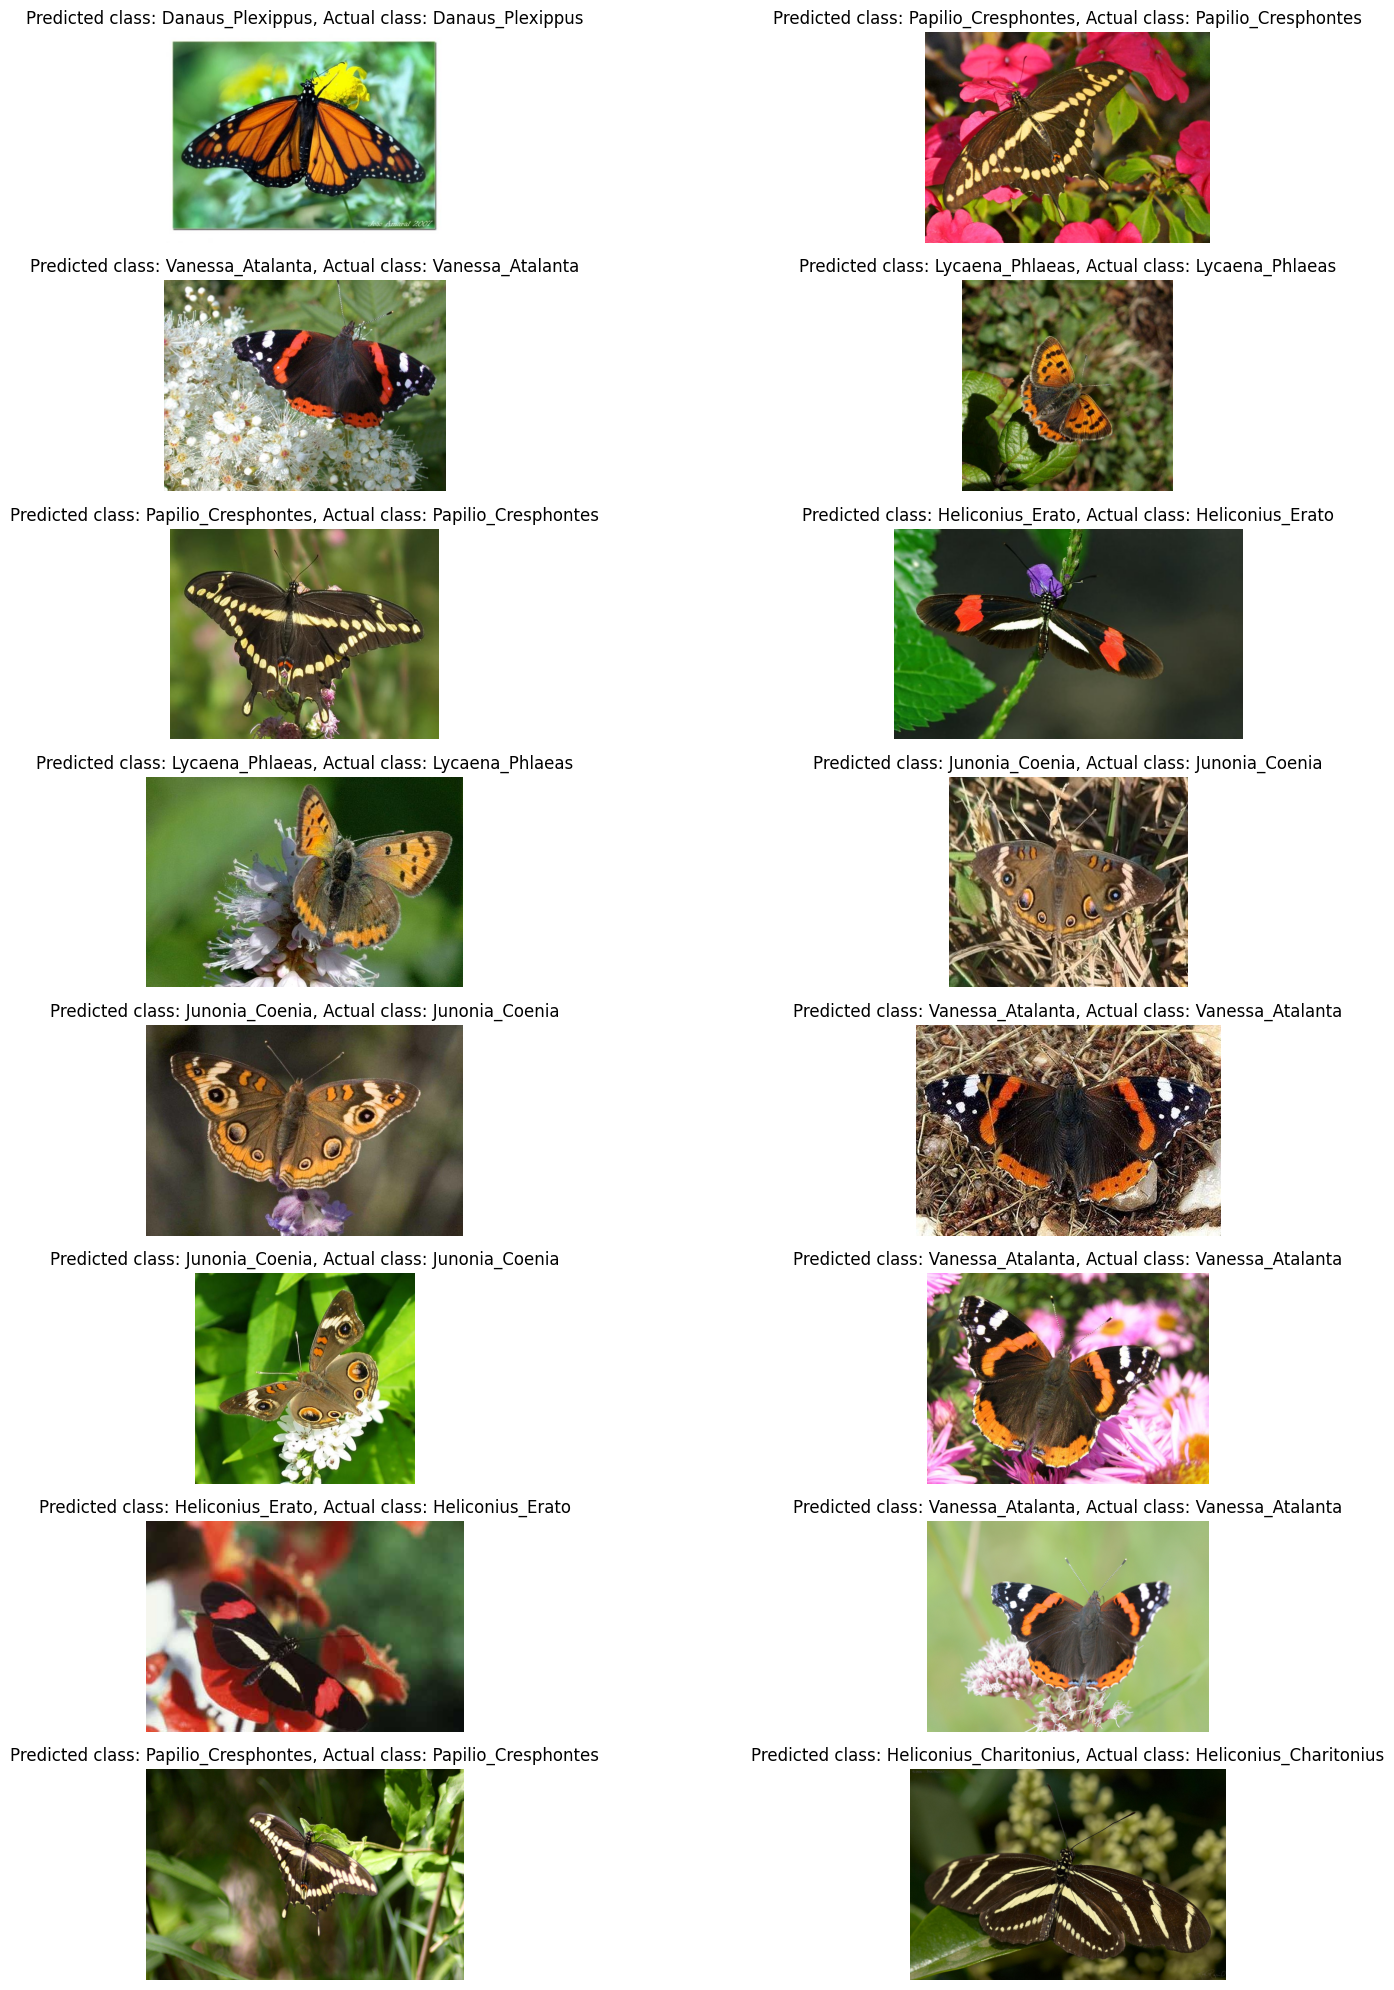

In [174]:
import os

# Define the class names based on the order of folders in train_dir
class_names = sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train'))

# Extract only the name of the image (without the full path)
image_names = [os.path.basename(file) for file in predict_files]

# Define a function to visualize images
def visualize_images(files, labels, actual_labels, num_images=16):
    fig, axes = plt.subplots(8, 2, figsize=(20, 20))
    for i, ax in enumerate(axes.flatten()):
        # Load and display image
        image = cv2.imread(files[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')

        # Set title with predicted and actual labels
        predicted_index = labels[i]
        predicted_class = class_names[predicted_index]
        actual_class = "_".join(os.path.basename(image_id[i]).split('_')[:2])
        ax.set_title(f"Predicted class: {predicted_class}, Actual class: {actual_class}")

        if i == num_images - 1:
            break
    plt.tight_layout()
    plt.show()

# Visualize 20 images along with their predicted and actual labels
visualize_images(predict_files, predictor, image_id, num_images=32)


In [175]:
import contextlib
def predict_and_visualize_single_image(image_path, model, class_names):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256)).astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)

    # Predict the image using the model
    with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
        prediction = model.predict(image)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    probability = prediction[0][predicted_index]

    # Visualize the image with the predicted class name and probability
    plt.imshow(image[0])
    plt.title(f"Predicted class: {predicted_class}\nProbability: {probability:.4f}\n")
    plt.axis('off')
    plt.show()

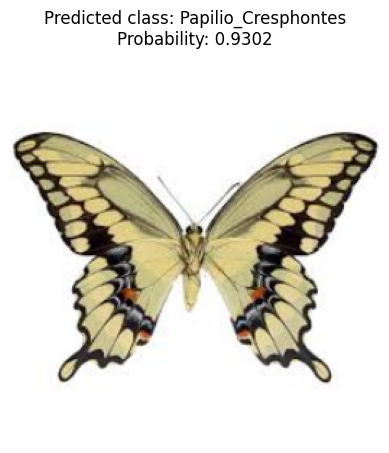

In [178]:
predict_and_visualize_single_image("/content/images.jpg",model,class_names)

In [179]:
from tensorflow.keras.models import load_model
# Assuming your trained model is saved as 'my_model.h5'
model = load_model('/content/butterflies_inception_v3_model_tl.h5')

In [180]:
model.layers

In [182]:
# Step 1 - Set up fine tuning on pre-trained ImageNet Inception_V3 model - freeze lower 94 layers only
for layer in model.layers[:94]:
    layer.trainable = False
for layer in model.layers[94:]:
    layer.trainable = True
# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(learning_rate = 0.0001, momentum=0.9),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    epochs = nb_epochs,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = validate_generator,
    validation_steps = nb_validate_samples//batch_size)
print('Training time: %s' % (now() - t))

<ipython-input-182-dec469e61f99>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fine_tuning_history = model.fit_generator(


Epoch 1/20
18/18 [==============================] - 33s 1s/step - loss: 1.0120 - accuracy: 0.6750 - val_loss: 0.1753 - val_accuracy: 0.9563
Epoch 2/20
18/18 [==============================] - 16s 888ms/step - loss: 0.6513 - accuracy: 0.7857 - val_loss: 0.1200 - val_accuracy: 0.9688
Epoch 3/20
18/18 [==============================] - 17s 945ms/step - loss: 0.3924 - accuracy: 0.8714 - val_loss: 0.0811 - val_accuracy: 0.9688
Epoch 4/20
18/18 [==============================] - 17s 948ms/step - loss: 0.2695 - accuracy: 0.9321 - val_loss: 0.1287 - val_accuracy: 0.9750
Epoch 5/20
18/18 [==============================] - 17s 950ms/step - loss: 0.2446 - accuracy: 0.9375 - val_loss: 0.2158 - val_accuracy: 0.9563
Epoch 6/20
18/18 [==============================] - 15s 846ms/step - loss: 0.1968 - accuracy: 0.9518 - val_loss: 0.1517 - val_accuracy: 0.9688
Epoch 7/20
18/18 [==============================] - 17s 948ms/step - loss: 0.1825 - accuracy: 0.9482 - val_loss: 0.1248 - val_accuracy: 0.9500
Ep

In [183]:
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-183-cdd2db689a76>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)


Test Score: 0.061803270131349564
Test Accuracy: 0.9881656765937805


In [184]:
model.save('finetuned_butterflies_inception_v3_model_ft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


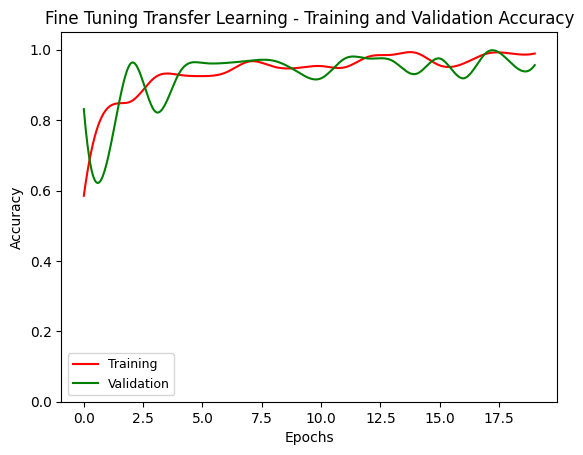

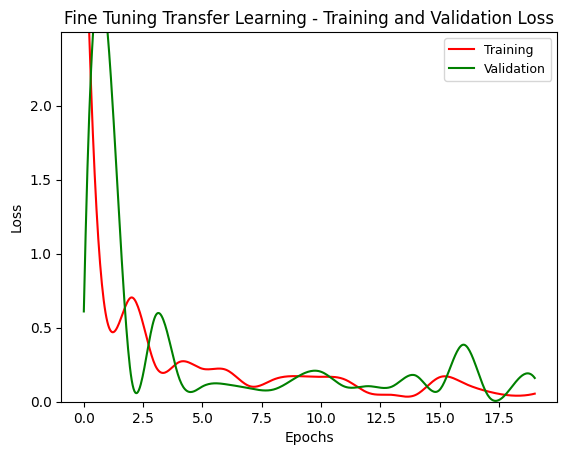

In [187]:
from scipy.interpolate import interp1d

xfer_acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Fine Tuning Transfer Learning - Training and Validation Accuracy')
plt.legend(loc='lower left', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Fine Tuning Transfer Learning - Training and Validation Loss')
plt.legend(loc='upper right', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(y1))
plt.show()


In [186]:
validate_generator.total_batches_seen

512

In [188]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

1/1 [==============================] - 0s 116ms/step


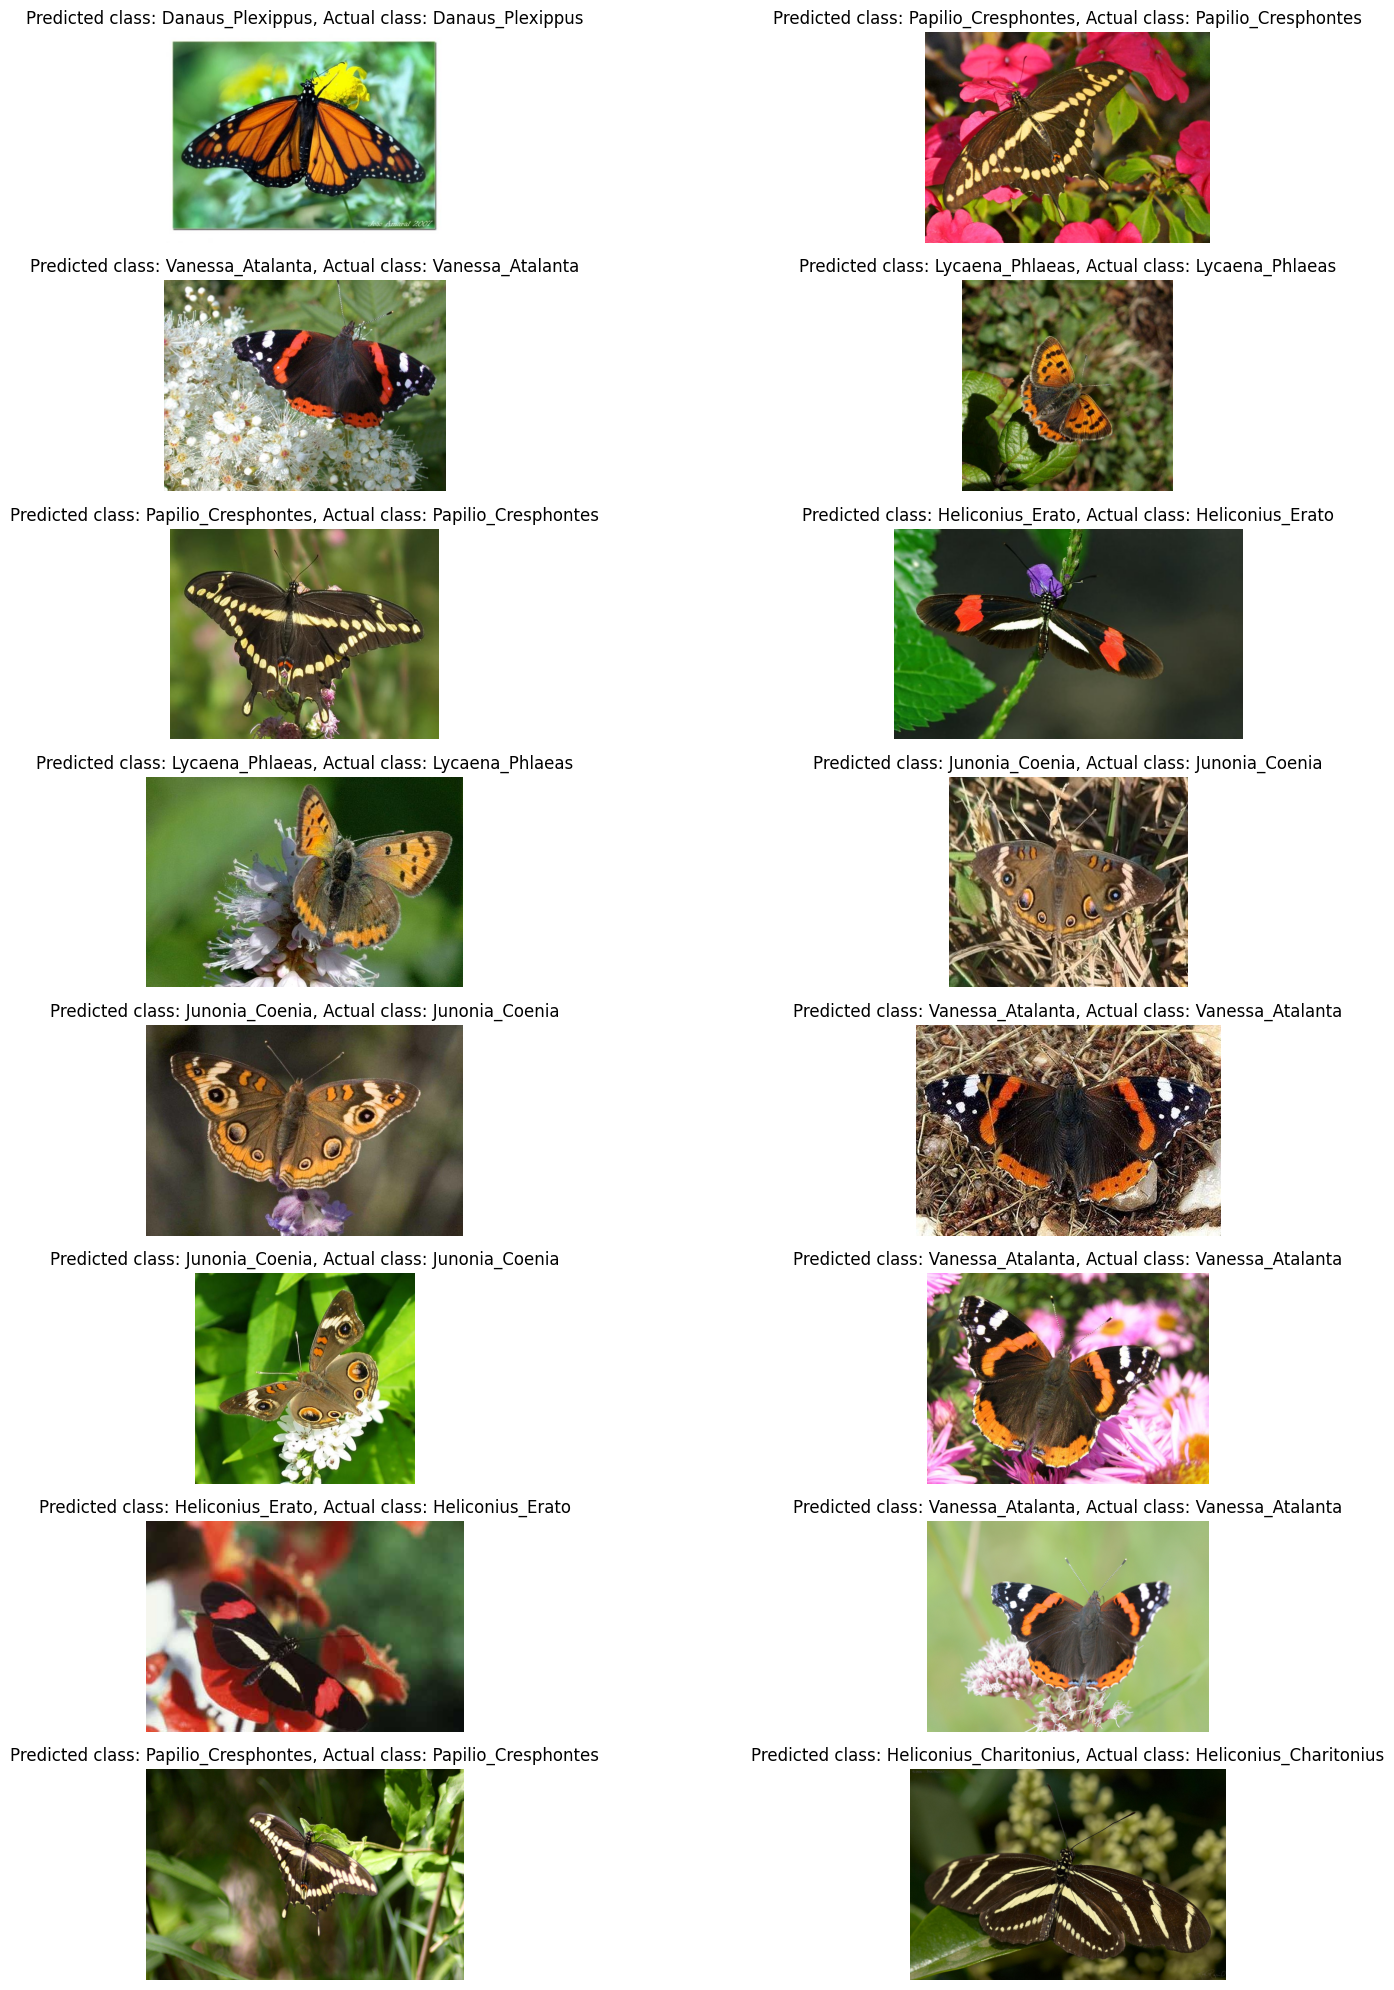

In [189]:
import os

# Define the class names based on the order of folders in train_dir
class_names = sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train'))

# Extract only the name of the image (without the full path)
image_names = [os.path.basename(file) for file in predict_files]

# Define a function to visualize images
def visualize_images(files, labels, actual_labels, num_images=16):
    fig, axes = plt.subplots(8, 2, figsize=(20, 20))
    for i, ax in enumerate(axes.flatten()):
        # Load and display image
        image = cv2.imread(files[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')

        # Set title with predicted and actual labels
        predicted_index = labels[i]
        predicted_class = class_names[predicted_index]
        actual_class = "_".join(os.path.basename(image_id[i]).split('_')[:2])
        ax.set_title(f"Predicted class: {predicted_class}, Actual class: {actual_class}")

        if i == num_images - 1:
            break
    plt.tight_layout()
    plt.show()

# Visualize 20 images along with their predicted and actual labels
visualize_images(predict_files, predictor, image_id, num_images=32)


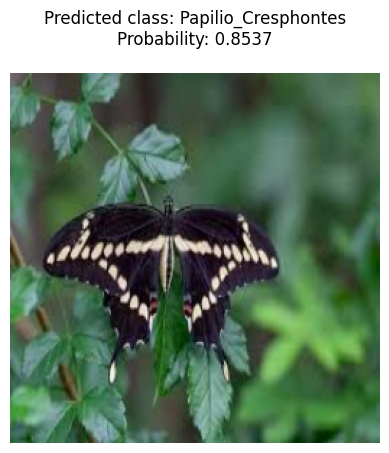

In [190]:
predict_and_visualize_single_image("/content/download.jpg",model,class_names)